In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import cv2
img =[]
vidcap = cv2.VideoCapture("drive/My Drive/final submission/videos/vid1.mp4")
count = 0
success = True
fps = int(vidcap.get(cv2.CAP_PROP_FPS))

while success:
    success,image = vidcap.read()
    print('read a new frame:',success)
    if count%(10*fps) == 0 :
         cv2.imwrite('frame%d.jpg'%count,image)
         img.append(image)
         print('successfully written 10th frame')
    count+=1

read a new frame: True
successfully written 10th frame
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
re

In [3]:
print(len(img))

16


In [0]:
#use the frames you get from the video to find the slots
import cv2
img = []
listt = ["frame0.jpg","frame1650.jpg","frame2250.jpg","frame300.jpg","frame600.jpg"]
for i in listt:
  path = i
  img.append(cv2.imread(path))

[INFO] loading Mask R-CNN from disk...
124


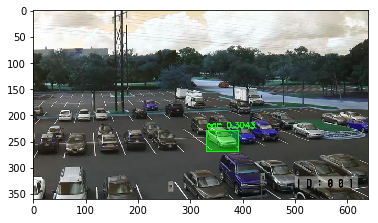

In [5]:
#code for slots detection
# import the necessary packages
import numpy as np
import argparse
import random
import time
import cv2
import os
from matplotlib import pyplot as plt

# load the COCO class labels our Mask R-CNN was trained on
labelsPath = "drive/My Drive/AI_CHALLENGE_TECHGIG/CODE/mask-rcnn/mask-rcnn-coco/object_detection_classes_coco.txt"
LABELS = open(labelsPath).read().strip().split("\n")

# load the set of colors that will be used when visualizing a given
# instance segmentation
colorsPath = "drive/My Drive/AI_CHALLENGE_TECHGIG/CODE/mask-rcnn/mask-rcnn-coco/colors.txt" 
COLORS = open(colorsPath).read().strip().split("\n")
COLORS = [np.array(c.split(",")).astype("int") for c in COLORS]
COLORS = np.array(COLORS, dtype="uint8")

# derive the paths to the Mask R-CNN weights and model configuration
weightsPath = "drive/My Drive/AI_CHALLENGE_TECHGIG/CODE/mask-rcnn/mask-rcnn-coco/frozen_inference_graph.pb"
configPath = "drive/My Drive/AI_CHALLENGE_TECHGIG/CODE/mask-rcnn/mask-rcnn-coco/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"

# load our Mask R-CNN trained on the COCO dataset (90 classes)
# from disk
print("[INFO] loading Mask R-CNN from disk...")
net = cv2.dnn.readNetFromTensorflow(weightsPath, configPath)

# sX = []
# sY = []
# eX = []
# eY = []
coordi = []
for i in range(0,5):
  image = img[i]
  # load our input image and grab its spatial dimensions
  #image = cv2.imread("gdrive/My Drive/AI_CHALLENGE_TECHGIG/CODE/mask-rcnn/images/test.jpg")
  #image = img2
  (H, W) = image.shape[:2]

  # construct a blob from the input image and then perform a forward
  # pass of the Mask R-CNN, giving us (1) the bounding box  coordinates
  # of the objects in the image along with (2) the pixel-wise segmentation
  # for each specific object
  blob = cv2.dnn.blobFromImage(image, swapRB=True, crop=False)
  net.setInput(blob)
  start = time.time()
  (boxes, masks) = net.forward(["detection_out_final", "detection_masks"])
  end = time.time()

  # show timing information and volume information on Mask R-CNN
 # print("[INFO] Mask R-CNN took {:.6f} seconds".format(end - start))
  #print("[INFO] boxes shape: {}".format(boxes.shape))
  #print("[INFO] masks shape: {}".format(masks.shape))


  # loop over the number of detected objects
  for i in range(0, boxes.shape[2]):
    # extract the class ID of the detection along with the confidence
    # (i.e., probability) associated with the prediction
    classID = int(boxes[0, 0, i, 1])
    confidence = boxes[0, 0, i, 2]

    # filter out weak predictions by ensuring the detected probability
    # is greater than the minimum probability
    if confidence > 0:
      # clone our original image so we can draw on it
      clone = image.copy()

      # scale the bounding box coordinates back relative to the
      # size of the image and then compute the width and the height
      # of the bounding box
      box = boxes[0, 0, i, 3:7] * np.array([W, H, W, H])
      (startX, startY, endX, endY) = box.astype("int")
      boxW = endX - startX
      boxH = endY - startY

      # extract the pixel-wise segmentation for the object, resize
      # the mask such that it's the same dimensions of the bounding
      # box, and then finally threshold to create a *binary* mask
      mask = masks[i, classID]
      mask = cv2.resize(mask, (boxW, boxH),
        interpolation=cv2.INTER_NEAREST)
      mask = (mask > 0)

      # extract the ROI of the image
      roi = clone[startY:endY, startX:endX]

      # check to see if are going to visualize how to extract the
      # masked region itself
      if 1 > 0:
  # 			convert the mask from a boolean to an integer mask with
  # 			to values: 0 or 255, then apply the mask
        visMask = (mask * 255).astype("uint8")
        instance = cv2.bitwise_and(roi, roi, mask=visMask)

        # show the extracted ROI, the mask, along with the
        # segmented instance
      plt.imshow(roi)
      plt.imshow(visMask)
      plt.imshow(instance)

      # now, extract *only* the masked region of the ROI by passing
      # in the boolean mask array as our slice condition
      roi = roi[mask]

      # randomly select a color that will be used to visualize this
      # particular instance segmentation then create a transparent
      # overlay by blending the randomly selected color with the ROI
      color = random.choice(COLORS)
      blended = ((0.4 * color) + (0.6 * roi)).astype("uint8")

      # store the blended ROI in the original image
      clone[startY:endY, startX:endX][mask] = blended


      # draw the bounding box of the instance on the image
      color = [int(c) for c in color]
      cv2.rectangle(clone, (startX, startY), (endX, endY), color, 2)



      # draw the predicted label and associated probability of the
      # instance segmentation on the image
      text = "{}: {:.4f}".format(LABELS[classID], confidence)
      cv2.putText(clone, text, (startX, startY - 5),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

      # show the output image
      plt.imshow(clone)
      #cv2.waitKey(0)

#       sX.append(startX)
#       sY.append(startY)
#       eX.append(endX)
#       eY.append(endY)
      coordi.append([startX,startY,endX,endY])

# print(sX)
# print(sY)
# print(eX)
# print(eY)
print(len(coordi))

In [0]:
#code for IoU(intersection over union)
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [0]:
#next 3 blocks are used to zero down on the coordinates of the slots 
coordi_copy = coordi.copy()
freqlist = []
i = 0
while i<len(coordi_copy):
  freq = 0
  j = i+1
  while j<len(coordi_copy):
    order = [0,2,1,3]
    a = {'x1':coordi_copy[i][0],'x2':coordi_copy[i][2],'y1':coordi_copy[i][1],'y2':coordi_copy[i][3]}
    b = {'x1':coordi_copy[j][0],'x2':coordi_copy[j][2],'y1':coordi_copy[j][1],'y2':coordi_copy[j][3]}
    iou = get_iou(a,b)
    if(iou>=0.5):
      freq = freq+1
      coordi_copy.remove(coordi_copy[j])
    j = j + 1
  freqlist.append([coordi_copy[i],freq])
  i = i + 1  

In [0]:
finalfreq = []

for i in freqlist:
  if i[1]>0:
    finalfreq.append(i)

In [0]:
rect_coordi = []
for i in range(len(finalfreq)):
  rect_coordi.append(finalfreq[i][0])
#(rect_coordi)

In [0]:
#save coordinates in csv file
data = []
import csv
for i in range(len(rect_coordi)):
	data.append(rect_coordi[i][0])
	data.append(rect_coordi[i][1])
	data.append(rect_coordi[i][2])
	data.append(rect_coordi[i][3])

	with open(r'ac.csv', 'a') as f:
		writer = csv.writer(f)
		writer.writerow(data)

	data.clear()

**Below are the blocks to be run for testing images(from the same camera)**

In [11]:
# open file
#eah row corresponds to the (sX,sY,eX,eY) coordinates
l = []
with open(r'ac.csv', 'rt') as f:
  reader = csv.reader(f)
  for row in reader:
    print(row)
    l.append(row)

['426', '283', '506', '346']
['546', '273', '640', '329']
['350', '272', '444', '350']
['491', '284', '621', '348']
['413', '194', '499', '232']
['410', '212', '469', '256']
['372', '223', '429', '259']
['173', '230', '214', '267']
['288', '162', '325', '190']
['187', '189', '212', '210']
['220', '231', '275', '270']
['495', '216', '558', '249']
['80', '194', '118', '219']
['553', '197', '634', '228']
['282', '303', '371', '360']
['3', '246', '46', '276']
['207', '223', '241', '249']
['2', '244', '47', '275']
['59', '239', '103', '275']
['330', '228', '392', '267']
['207', '180', '238', '198']
['129', '313', '195', '360']
['322', '199', '379', '228']
['575', '205', '637', '234']
['258', '183', '287', '209']
['121', '224', '173', '272']


In [12]:
!pip install webcolors

In [0]:
#code to get colors of cars
from sklearn.cluster import KMeans
import webcolors

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

def find_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist
def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0
    per_col = []
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
#         print(percent,",",color.astype("uint8").tolist())
        per_col.append(list((percent,color.astype("uint8").tolist())))
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return per_col

def get_color_code(image):
  #img = cv2.imread(image)
  img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
  clt = KMeans(n_clusters=5) #cluster number
  clt.fit(img)

  hist = find_histogram(clt)
  colors = plot_colors2(hist, clt.cluster_centers_)

  t = max(colors)
  actual_name, closest_name = get_colour_name(t[1])
  #print(actual_name,closest_name)
  
  
  white = [255,255,255]
  silver = [192,192,192]
  black = [0,0,0]
  grey = [128,128,128]
  blue = [0,0,255]
  red = [255,0,0]
  green = [0,255,0]
  brown = [165,42,42]
  
  color_list = [white,silver,black,grey,blue,red,green,brown]
  diff = []
  for i in color_list:
    d = ((t[1][0]-i[0])**2 + (t[1][1]-i[1])**2 + (t[1][2]-i[2])**2)**0.5
    diff.append(d)
  
  min = 1000000.00
  minj = -1
  for j in range(len(diff)):
    if diff[j]<min:
      min = diff[j]
      minj = j
  return (minj)
# plt.axis("on")
# plt.imshow(bar)
# plt.show()

In [0]:
#crop the test images to get roi
int_l = []
for i in range(len(l)):
  int_l.append(list(map(int,l[i])))

test = cv2.imread("frame1500.jpg") #give the path for test image
from PIL import Image
test_img = Image.fromarray(test)
for i in range(len(int_l)):
  croped_img = test_img.crop(int_l[i])
  name = "roi"+str(i+1)+".png"
  croped_img.save(name,"PNG")

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.


In [0]:
import os
train_image = []

for pose in os.listdir('drive/My Drive/AI_CHALLENGE_TECHGIG/POSE/FRONT/'):
  path = 'drive/My Drive/AI_CHALLENGE_TECHGIG/POSE/FRONT/' + pose
  img = image.load_img(path, target_size=(32,32,3), grayscale=False)
  img = image.img_to_array(img)
  img = img/255
  train_image.append(img)
for pose in os.listdir('drive/My Drive/AI_CHALLENGE_TECHGIG/POSE/BACK/'):
  path = 'drive/My Drive/AI_CHALLENGE_TECHGIG/POSE/BACK/' + pose
  img = image.load_img(path, target_size=(32,32,3), grayscale=False)
  img = image.img_to_array(img)
  img = img/255
  train_image.append(img)
for pose in os.listdir('drive/My Drive/AI_CHALLENGE_TECHGIG/POSE/SIDE/'):
  path = 'drive/My Drive/AI_CHALLENGE_TECHGIG/POSE/SIDE/' + pose
  img = image.load_img(path, target_size=(32,32,3), grayscale=False)
  img = image.img_to_array(img)
  img = img/255
  train_image.append(img)
  
X = np.array(train_image)

In [0]:
label_f = np.zeros(40,int)
label_b = np.ones(32,int)
label_s = 2*np.ones(12,int)
labels = np.concatenate((label_f,label_b,label_s),axis=0)

In [0]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


Y = to_categorical(labels)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10, shuffle=True)

x_train = x_train.reshape(-1,32,32,3)   #Reshape for CNN -  should work!!
x_test = x_test.reshape(-1,32,32,3)

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


W0622 04:03:06.701719 140635658663808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0622 04:03:06.744503 140635658663808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0622 04:03:06.751999 140635658663808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0622 04:03:06.793596 140635658663808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0622 04:03:06.799072 140635658663808 deprecation_wrapp

In [22]:
model_log = model.fit(x_train, y_train,
                      batch_size=20,
          epochs=25,
          verbose=1,
          validation_data=(x_test, y_test))

W0622 04:03:10.168654 140635658663808 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 67 samples, validate on 17 samples
Epoch 1/25
67/67 [==============================] - 7s 103ms/step - loss: 1.1661 - acc: 0.4925 - val_loss: 1.0372 - val_acc: 0.5294
Epoch 2/25
67/67 [==============================] - 0s 418us/step - loss: 1.1514 - acc: 0.4627 - val_loss: 1.0307 - val_acc: 0.5294
Epoch 3/25
67/67 [==============================] - 0s 439us/step - loss: 0.9993 - acc: 0.5373 - val_loss: 0.9406 - val_acc: 0.4706
Epoch 4/25
67/67 [==============================] - 0s 455us/step - loss: 0.9305 - acc: 0.5373 - val_loss: 0.8386 - val_acc: 0.5294
Epoch 5/25
67/67 [==============================] - 0s 410us/step - loss: 0.8447 - acc: 0.6269 - val_loss: 0.8009 - val_acc: 0.5294
Epoch 6/25
67/67 [==============================] - 0s 422us/step - loss: 0.7788 - acc: 0.7463 - val_loss: 0.7201 - val_acc: 0.7059
Epoch 7/25
67/67 [==============================] - 0s 435us/step - loss: 0.6255 - acc: 0.7164 - val_loss: 0.7059 - val_acc: 0.7647
Epoch 8/25
67/67 [==============

In [0]:
from keras.preprocessing import image as Im
def get_pose(image_):
  pose_img = Im.load_img(image_,target_size=(32,32,3),grayscale=False)
  pose_img = Im.img_to_array(pose_img)
  pose_img = pose_img/255
  test = []
  test.append(pose_img)
  predictions = model.predict_classes(np.array(test))
  return predictions[0]

In [35]:
#get the results for the test image
import math
labelsPath = "drive/My Drive/AI_CHALLENGE_TECHGIG/CODE/mask-rcnn/mask-rcnn-coco/object_detection_classes_coco.txt"
LABELS = open(labelsPath).read().strip().split("\n")

# load the set of colors that will be used when visualizing a given
# instance segmentation
colorsPath = "drive/My Drive/AI_CHALLENGE_TECHGIG/CODE/mask-rcnn/mask-rcnn-coco/colors.txt" 
COLORS = open(colorsPath).read().strip().split("\n")
COLORS = [np.array(c.split(",")).astype("int") for c in COLORS]
COLORS = np.array(COLORS, dtype="uint8")

# derive the paths to the Mask R-CNN weights and model configuration
weightsPath = "drive/My Drive/AI_CHALLENGE_TECHGIG/CODE/mask-rcnn/mask-rcnn-coco/frozen_inference_graph.pb"
configPath = "drive/My Drive/AI_CHALLENGE_TECHGIG/CODE/mask-rcnn/mask-rcnn-coco/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"

# load our Mask R-CNN trained on the COCO dataset (90 classes)
# from disk
print("[INFO] loading Mask R-CNN from disk...")
net = cv2.dnn.readNetFromTensorflow(weightsPath, configPath)

def foo(image,num):
  blob = cv2.dnn.blobFromImage(image,swapRB=True, crop=False)
  net.setInput(blob)
  start = time.time()
  (boxes, masks) = net.forward(["detection_out_final", "detection_masks"])
  end = time.time()

  # show timing information and volume information on Mask R-CNN
  print(num)
  #print("[INFO] Mask R-CNN took {:.6f} seconds".format(end - start))
  #print("[INFO] boxes shape: {}".format(boxes.shape))
  #print("[INFO] masks shape: {}".format(masks.shape))

  for j in range(0, boxes.shape[2]):
    classID = int(boxes[0, 0, j, 1])
    confidence = boxes[0, 0, j, 2]
    #print(LABELS[classID]," ",confidence)
    if LABELS[classID]!="person" and confidence>0.0:
      return True
    else: return False
  return False

def center(x):
  cx = (math.floor((x[2]-x[0])/2)+x[0])
  cy = (math.floor((x[3]-x[1])/2)+x[1])
  return (cx,cy)

# load our input image and grab its spatial dimensions
for i in range(len(int_l)):
  img_name = "roi"+str(i+1)+".png"
  image = cv2.imread(img_name)
  resized = cv2.resize(image,(224,224))
  if foo(resized,(i+1)):
    print(int_l[i],",",center(int_l[i]),",",1,",",get_color_code(image),",",get_pose(img_name))
    cv2.rectangle(test,(int_l[i][0],int_l[i][1]),(int_l[i][2],int_l[i][3]),(255,0,0),2)
    cv2.circle(test,center(int_l[i]),6,(255,0,0),-1)
  else:
    print(int_l[i],",",center(int_l[i]),",",0,",",get_color_code(image),",",get_pose(img_name))
    cv2.rectangle(test,(int_l[i][0],int_l[i][1]),(int_l[i][2],int_l[i][3]),(0,255,0),2)
    cv2.circle(test,center(int_l[i]),6,(0,255,0),-1)
    
plt.imshow(test)

[INFO] loading Mask R-CNN from disk...
1
[426, 283, 506, 346] , (466, 314) , 1 , 2 , 0
2
[546, 273, 640, 329] , (593, 301) , 1 , 2 , 1


KeyboardInterrupt: ignored

In [0]:
#accuracy of cars detected
slots_detected = int(input("Enter the number of slots detetcted(rectangles in the image):"))
cars_detected = int(input("Enter the number of red colored rectangles:"))
accuracy = cars_detected/slots_detected
print("Accuracy:",accuracy)

Enter the number of slots detetcted(rectangles in the image):52
Enter the number of red colored rectangles:36
Accuracy: 0.6923076923076923
